<center>
<a href="http://uf-mi.u-bordeaux.fr/MSS/" ><img src="https://www.math.u-bordeaux.fr/~jbigot/Site/Enseignement_files/logo_MAS_MSS.jpg" style="float:left; max-width: 400px; display: inline" alt="INSA"/></a> 

<a href="https://www.math.u-bordeaux.fr/" ><img src="https://www.math.u-bordeaux.fr/~jbigot/Site/Enseignement_files/LogoIMB.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

# <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 200px; display: inline" alt="Python"/></a> UE M2 Master MAS-MSS et CIMI ISI Projet Données Massives

# Algorithmes stochastiques pour la régression logistique avec <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 150px; display: inline" alt="Python"/></a> & <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 180px; display: inline" alt="Scikit-Learn"/></a>
**Résumé**: 

Dans ce projet, vous devrez implémenter de trois algorithmes stochastiques pour la résolution d'un problème de régression logistique dans le cardre de classification supervisée binaire (à $K=2$ classes): 
- un algorithme de descente de gradient stochastique usuel tel que vous l'avez vu en cours
- l'algorithme ADAM : https://arxiv.org/pdf/1412.6980.pdf
- l'algorithme de Newton stochastique : https://arxiv.org/abs/1904.07908

Pour évaluer ces algorithmes, vous devrez les appliquer à trois problèmes de classification binaire différents:
- Des données 2D simulées
- La classification des images MNIST de taille 28 * 28 ( *liste de tâches à donner le 17 Janvier*)
- La prédiction de présence d'éoliennes dans des images de taille 128 * 128 * 3 ( *liste de tâches à donner le 17 Janvier*)

et plus comaprer leurs performances en terme de précision de la classification ainsi que de temps de convergence. 

Pour le rapport: 

- à réaliser en jupyter notebook, avec le code et **la sortie**
- à me rendre **avant 7 Février**

###  <span style="color:red"> 17 Jan </style>

### Courbes d'entrainement de l'algorithme stochqstique 

Voici les 2 courbes d'entraînement à partir du mini-batch descente de gradient avec de differents pas

#### HP: n_epoch = 5, batch_size = 10, alpha = 0.5, *c = 10*

<img src="c10.png" width=800 height=800/>

#### HP: n_epoch = 5, batch_size = 10, alpha = 0.5, *c = 1* 

<img src="c1.png" width=800 height=800/>

On peut remarquer que les courbes bruyantes par rapport aux algos déterministes. En plus, les courbes changent de d'une réalisation de l'algo à l'autre.

c'est normal le résultat de l'epoch $l$ est pire que celui de l'epoch $l-1$, 
Mais, quand l'algo n'a pas convergé, même avec le stochasticité, le résultat s'améliore consécutivement à l'échelle d'epoch (plus évident pour le coût d'entraînement que d'autres metrics). 

**Pour la réglage:**

Il faut déjà tracer les courbes d'entraînement pour chaque combinaison des hyperparamètres, afin de ne pas être perturbé par la stochasticité. Par exemple, le **c = 1** donne la meilleure performance que **c = 10**, basée sur les courbes ci-dessous. Bien sûr on peut augmenter le nombre d'épochs jusqu'auquel l'algo soit convergé.   

Mais, ce n'est pas possible quand le jeu de données est grand et le nombre de HP est important. (On va revenir sur ce point plus tard.)

*Pour ce jeu de données simulé, (si c'est trop compliqué de déterminer quelle est la meilleur) dès que ton taux d'erreur atteint env 0.12, c'est bon pour moi !*

**Pour la question:**
- faites varier une fois un hyperparamètre
- dans la question, la performance est évalué de côte de $\|\hat{\theta}^{(k)} - \theta_{lr}\|_2^2$ non pas de la précision $^*$, donc vous devrez calculer $\|\hat{\theta}^{(k)} - \theta_{lr}\|$ pour chaque combinaison.

$^*$: car c'est possible de voir un meilleur $\|\hat{\theta}^{(k)} - \theta_{lr}\|_2^2$ et le pire err en même temps 

## 2 Comparaison des algorithmes sur le jeu de données MNIST

In [185]:
import tensorflow as tf
from sklearn import model_selection
import time
import numpy as np
from numpy.random import rand
import pandas as pd
import matplotlib.pyplot as plt
import os 

In [186]:
# Importation des données de la base MNIST
from keras.datasets import mnist

# Importation de librairies Python
import numpy as np
from keras.utils import np_utils

# Le réseau est de type feed-forward et complètement connecté
# On importe donc les modèles correspondants
from keras.models import Sequential
from keras.layers import Dense

# Chargement des données MNIST sous la forme de deux ensembles (apprentissage et test)
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
Y_test_classes = Y_test

In [187]:
# Importation de librairies Python
import numpy as np
from keras.utils import np_utils

# Le réseau est de type feed-forward et complètement connecté
# On importe donc les modèles correspondants
from keras.models import Sequential
from keras.layers import Dense

# Convertion des données en vecteurs de taille 784
nb_pixels =  X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], nb_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], nb_pixels).astype('float32')

# Affichage des tailles des ensembles d'apprentissage et de test
print(X_train.shape)
print(X_test.shape)

# Normalisation des données (255 est le maximum des niveaux de gris)
X_train = X_train / 255
X_test = X_test / 255

(60000, 784)
(10000, 784)


In [188]:
# Restriction à la classe 0 versus 1
x_train = X_train[Y_train < 2,:]
y_train = Y_train[Y_train < 2]

x_test = X_test[Y_test < 2,:]
y_test = Y_test[Y_test < 2]

print(x_train.shape)
print(x_test.shape)

(12665, 784)
(2115, 784)


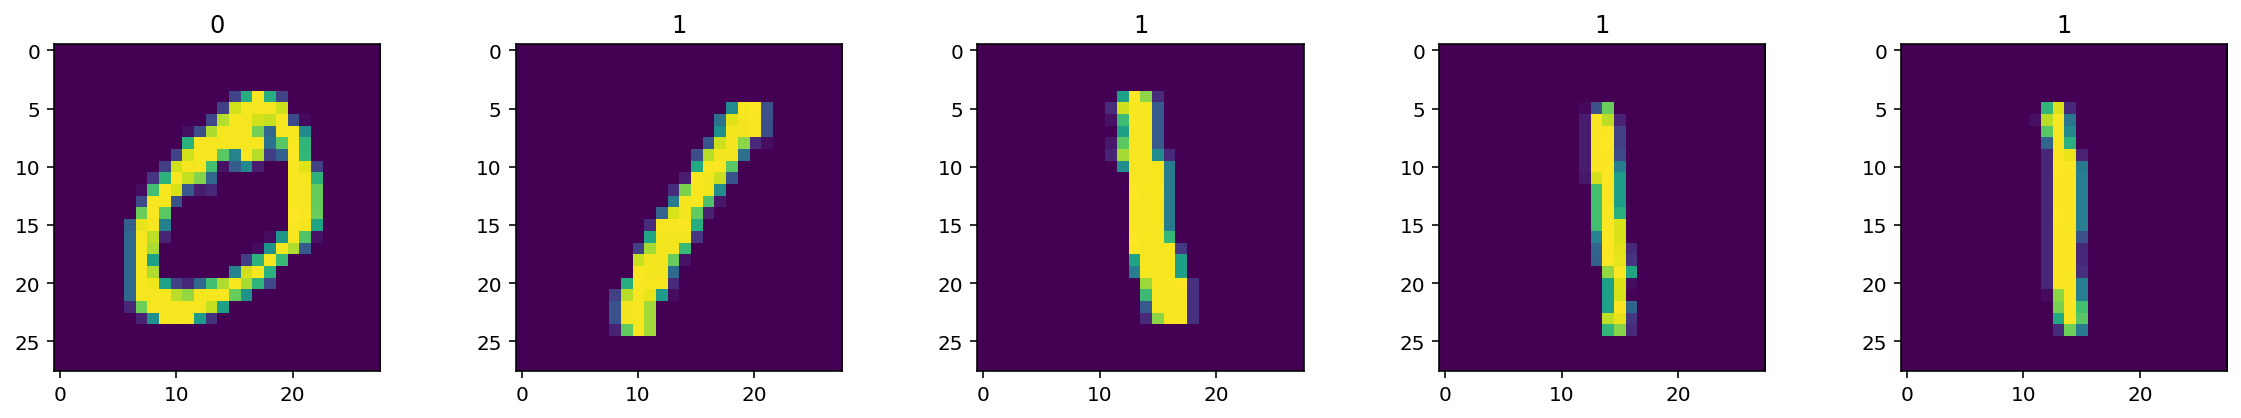

In [189]:
plt.rcParams["figure.figsize"] = (20,3)
for i in range(5):
    ax1 = plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i,:].reshape(28,28))
    plt.title(y_train[i])

In [155]:
# Définition du réseau de neurones
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=(784,), activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 785       
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
745/745 [==============================] - 1s 1ms/step - loss: 0.0126 - accuracy: 0.9965 - val_loss: 0.0026 - val_accuracy: 0.9995
Epoch 2/10
745/745 [==============================] - 1s 972us/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 3/10
745/745 [==============================] - 1s 930us/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0023 - val_accuracy: 0.9991
Epoch 4/10
745/745 [==============================] - 1s 1ms/step - loss: 0.0020 - accuracy: 0.9992 - val_loss: 7.2622e-04 - val_accuracy: 0.9995
Epoch 5/10
745/745 [==============================] - 1s 942us/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0018 - val_accuracy: 0.9995
Epoch 6/10
745/745 [==============================] - 1s 945us/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9995
Epoch 7/10
745/745 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0030 - val_accuracy: 0

<Figure size 576x432 with 0 Axes>

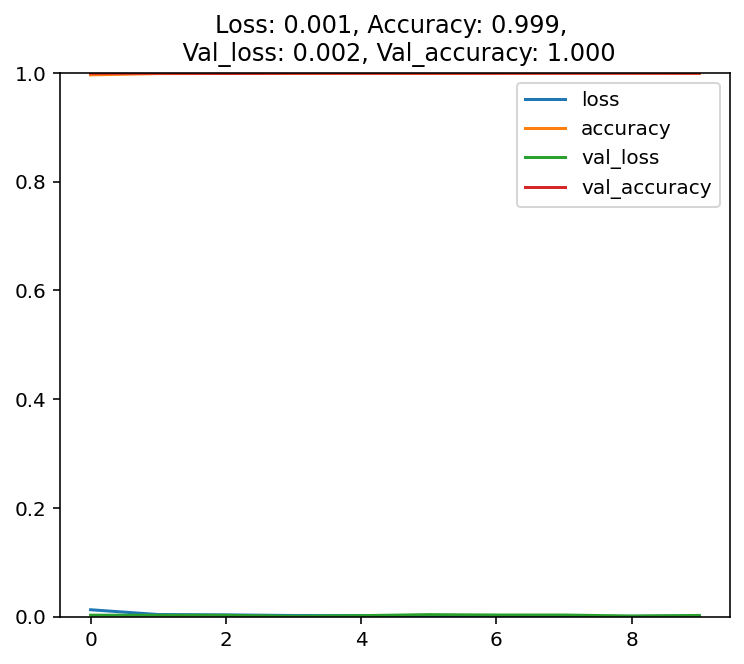

In [156]:
# Entrainement
plt.rcParams["figure.figsize"] = (6,5)
history = model.fit(x=x_train, y=y_train, batch_size= 17, verbose=1, epochs=10, validation_data=(x_test,y_test))
plot_loss_accuracy(history)

### Travail à réaliser pour MNIST

Implémentez le mini-batch descente de gradient, le mini-batch ADAM et l'algorithme stochastique de Newton sur l'ensemble d'appretissage et réglez les hyperparamètres sur l'ensemble de validation: 


In [191]:
# train-validation split
x_train, x_val, y_train, y_val, = model_selection.train_test_split(x_train,y_train, test_size=.1)

**Réglage des hyperparamètres**

En pratique, on ne régle pas $n\_epoch$, au lieu, on arrête l'algo quand il arrive le point de **Early stopping**: 
https://en.wikipedia.org/wiki/Early_stopping 

<img src="early_stopping_algo_deterministe.png" width=500 height=500/>
(img src: https://medium.com/@rahuljain13101999/why-early-stopping-works-as-regularization-b9f0a6c2772)

Donc, dès que le loss_val commence à augmenter, on arrête l'algo et le dernier loss_val représente la performance du modèle aux hyperparamètres utilisés.   

Mais, la courbe d'entraînement de l'algo sto est bruyante, ctd, le loss_val augmente et descend d'une façon alternative. Comment on peut déterminer le point de **Early stopping**? 

<img src="MNIST_ADAM.png" width=1000 height=1000/>

Après avoir arrêté l'algo, la moyenne des $n$ derniers loss_val se sert au critère de la réglage des hyperparamètres. 

Une situation: l'algo n'a toujours pas été arrêté par notre règle d'arrêt -> l'arrêt forcé à $nmax\_epoch$. 

Il y a toujours des situations imprévues ou extrêmes, ça veut dire que la règle d'arrêt n'est pas parfaite. Mais, on ne peut que faire confiance en lui, car sinon, le travail ne se termine jamais. 

***Revenons à notre travail:***

Malheureusement, sur ce jeu de données, seulement avec l'ADAM, c'est possible d'observer le pointe de Early stopping. Car il converge plus vite, par contre la descente de gradient, il prend plus d'epochs pour la eventuelle convergence et l'algo newton, déjà, il prend plus de temps pour finir un epoch. 

Mais dans l'esprit de pratiquer: 

Appliquez une règle de Early stopping pour tous 3 algos, avec l'arrêt forcé à $nmax\_epoch = 70$, et réglez les hyperparamètres.

NB: pour l'algo newton, vous pouvez l'arrêter plus tôt si vous n'avez pas de temps pour l'attendre finir ! 

**Evaluation**

Avec les meilleurs hyperparamètres, 

1. tracez les indicateurs de performance, plus exactement 

 - relevez le temps d'exécution de chaque itération
 
 A la fin de chaque itération $k$, avec le dernier $\hat{\theta}^{(k)}$
 - predites les classes des tous echantillons dans l'ensemble d'appretissage et calculez le taux d'erreur train
 - predites les classes des tous echantillons dans l'ensemble **validation** et culculez le taux d'erreur **val**
 - calculez la loss $\mathcal{L}_n$ i.e. l'opposé de log-vraisemblance normalisé train (utiliser tous les echantillons dans l'ensemble d'appretissage)
 - calculez la loss $\mathcal{L}_n$ i.e. l'opposé de log-vraisemblance normalisé *val* (utiliser tous les echantillons dans l'ensemble *val*)

 tracez ainsi: 
 - l'évolution du taux d'erreur train / val en fonction des itérations
 - l'évolution du taux d'erreur train / val en fonction du temps $^*$  
 - l'évolution du train / val loss en fonction des itérations 
 - l'évolution du train / val loss en fonction du temps
 
2. testez les performances de la classification pour les 3 algorithmes sur l'ensemble de **test**. L'ensemble de **test** n'est utilisé qu'une seule fois pour l'évaluation ultime ! 
 
Comparez et commentez les performances de 3 algorithmes 

## 3 Comparaison des algorithmes sur le jeu de données d'Airbus

Lien Données Airbus: https://filesender.renater.fr/?s=download&token=08b573a6-3452-4ce2-bbe9-7168b4bd5f09

In [2]:
from sklearn import model_selection
import pandas as pd
import numpy as np
import os 
from pylab import *

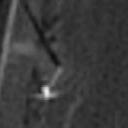

In [3]:
# Visulisation des données
import keras.preprocessing.image as kpi

# Chemin d'accès aux données
data_dir = '/Users/yiye/Dropbox/Projet Algorithmes Stochastiques et Régression logistique/data_projet_M2_MAS_MSS_CMI_ISI'

# Target
img = kpi.load_img(data_dir+'/train/target/C81820872.jpg', color_mode = "grayscale")
img

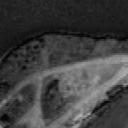

In [4]:
# Other
img = kpi.load_img(data_dir+'/train/other/S25105462.jpg', color_mode = "grayscale")
img

In [5]:
# Taille des données
x = kpi.img_to_array(img)  
x.shape

(128, 128, 1)

***Pour ce jeu de données massive, au lieu de importer tous les images et plus les utiliser, on importe une image à la fois pour faire le calcul qui la demande.***

In [6]:
# Cacul récursif de l'image moyenne dans une classe
img_size = 128

# Choix du canal de couleur RGB (0, 1 our 2)
RGB = 1

# Choix du répertoire contenant les données
directory = data_dir+'/train/target/'

# Choix de la taille des mini-batchs
batch_size = 10

# Initialisation
d = img_size**2
Xbar = np.zeros(d)

# Hyper-paramètres
c = 1
alpha = 0.5

batch_number = 0
batch_view = 100

if 'Xbatch' in locals() :
    del Xbatch

# Itérations
print('Mini-batch numéro : ', end='')
for f in os.listdir(directory):
    # Normalisation des données
    xt = kpi.img_to_array(kpi.load_img(directory+f))/255
    
    if 'Xbatch' in locals() :
        Xbatch = np.r_[Xbatch,xt[:,:,RGB].reshape(1,d)] 
    else:
        Xbatch = xt[:,:,RGB].reshape(1,d)
    
    if Xbatch.shape[0] == batch_size:
        batch_number +=1
        # Affichage du numéro de batch
        if batch_number % batch_view == 0:
            print('{}-'.format(batch_number), end='')
            
        # Descente de gradient stochastique
        gamma = c/(batch_number**alpha)
        Xbar = Xbar + gamma*(np.mean(Xbatch,0)-Xbar)
        del Xbatch

print(' Fin des itérations', end='\n')

Mini-batch numéro : 100-200-300-400-500-600-700-800-900-1000-1100-1200-1300-1400-1500-1600-1700-1800-1900-2000-2100-2200-2300-2400-2500-2600-2700-2800-2900-3000- Fin des itérations


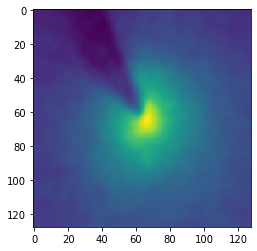

In [7]:
# Vérification
imgbar = Xbar.reshape(img_size,img_size)
plt.imshow(imgbar, interpolation='nearest')
plt.show()

In [8]:
# Création pointeurs vers ensemble d'apprentissage et ensemble de test
list_train_target = os.listdir(data_dir+'/train/target/')
list_train_other = os.listdir(data_dir+'/train/other/')
list_train = list_train_target + list_train_other

list_test_target = os.listdir(data_dir+'/test/target/')
list_test_other = os.listdir(data_dir+'/test/other/')
list_test = list_test_target + list_test_other

print(len(list_train))
print(len(list_test))

print(len(list_train_target)/len(list_train_other))

y_train = np.r_[np.ones(len(list_train_target)),np.zeros(len(list_train_other))]
y_test = np.r_[np.ones(len(list_test_target)),np.zeros(len(list_test_other))]

data_train = pd.DataFrame(data={'classe' : y_train, 'nom_fichier' : list_train})
print(data_train.head())

data_test = pd.DataFrame(data={'classe' : y_test, 'nom_fichier' : list_test})
print(data_test.head())

63218
5000
0.9302027357107963
   classe      nom_fichier
0     1.0  C4300728455.jpg
1     1.0  C4560858059.jpg
2     1.0  C4181457282.jpg
3     1.0  C1740751010.jpg
4     1.0  C2617156084.jpg
   classe      nom_fichier
0     1.0  C1111642322.jpg
1     1.0  C1151737717.jpg
2     1.0  C1110855152.jpg
3     1.0  C1151741695.jpg
4     1.0  C1074594371.jpg


In [9]:
from sklearn.utils import shuffle
data_train = shuffle(data_train)
print(data_train.head())

       classe      nom_fichier
30213     1.0  C2349694403.jpg
9744      1.0  C4179581018.jpg
33129     0.0  S5250109477.jpg
37651     0.0  S4694437128.jpg
32179     0.0  S1840622124.jpg


### Travail à realiser pour Airbus

In [10]:
data_train, data_val = model_selection.train_test_split(data_train, test_size=.1)
print(len(data_train))
print(len(data_val))

56896
6322


Implémentez le mini-batch descente de gradient, le mini-batch ADAM sur l'ensemble d'apprentissage et réglez les hyperparamètres sur l'ensemble de validation: 

*l'algorithme stochastique de Newton prends trop longtemps sur ce jeu de données

**Réglage des hyperparamètres ($nmax\_epoch = 20$)**

C'est dur d'attendre l'apparition de Early stopping. 

*Attention, pour la descente de gradient: un énorme $d$ -> le gradient facile à exploser pendant les premiers itérations.*

 D'un côté, le coût à $\hat{\theta}^{(0)}$ aléatoire est normalement grand -> le magnitude du gradient calculé à $\hat{\theta}^{(0)}$ est grand (pensez à $x^2$).

 D'autre, pour l'algo stochastique, il lui faut quelque itérations pour trouver la direction descendante du loss_train -> pendant les première iterations, $\hat{\theta}^{(k)}$ sont tous mis à jour dans la direction ascendante.

 Si le pas est de plus grand, avant que l'algo puisse trouver la direction descendante, le gradient a déjà explosé 

*Résolution:* baiser le pas. 

A observer: par contre pour l'ADAM, toujours facile à régler, e.g. $\gamma = 0.01$. 

**Evaluation**

Avec les meilleurs hyperparamètres,

1. tracez les indicateurs de performance à l'échelle de epochs, plus exactement

 - relevez le temps d'exécution de chaque **epoch**
 
 A la fin de chaque **epoch** $k$, avec le dernier $\hat{\theta}^{(k)}$
 - prédites les classes des tous échantillons dans l'ensemble d'apprentissage et calculez le taux d'erreur train
 - prédites les classes des tous échantillons dans l'ensemble val et calculez le taux d'erreur val
 - calculez la loss $\mathcal{L}_n$ i.e. l'opposé de log-vraisemblance normalisé train (utiliser tous les échantillons dans l'ensemble d'apprentissage)
 - calculez la loss $\mathcal{L}_n$ i.e. l'opposé de log-vraisemblance normalisé val (utiliser tous les échantillons dans l'ensemble val)

 tracez ainsi:
 - l'évolution du taux d'erreur train / val en fonction des **epochs**
 - l'évolution du taux d'erreur train / val en fonction du temps
 - l'évolution du train / val loss en fonction des **epochs**
 - l'évolution du train / val loss en fonction du temps
 
2. testez les performances de la classification pour les 2 algorithmes sur l'ensemble de test
 
Comparez et commentez les performances des 2 algorithmes. 

Dernièrement, voici le code Keras qui implement l'algo ADAM dans le cadre du reseau de neurone. Est-ce que ton code d'ADAM a la précision similaire ?

In [11]:
###################
# Deep learning
###################
epochs = 
batch_size= 

img_width = 128
img_height = 128

train_datagen = kpi.ImageDataGenerator(rescale = 1./255, validation_split=0.1)

# générateur qui lira les images trouvées dans les sous-dossiers de 'data/train'
train_generator = train_datagen.flow_from_directory(
        data_dir+"/train/",  # répertoire target 
        target_size=(img_width, img_height),  
        batch_size=batch_size,
        class_mode='binary', 
        color_mode="grayscale", 
        subset='training')  

# générateur pour les donnees de validation 
validation_generator = train_datagen.flow_from_directory(
        data_dir+"/train/",  
        target_size=(img_width, img_height),  
        batch_size=batch_size,
        class_mode='binary', 
        color_mode="grayscale", 
        subset='validation')  

Found 56897 images belonging to 2 classes.
Found 6321 images belonging to 2 classes.


In [12]:
######################
# Specify the model
######################
import tensorflow as tf

model_img = tf.keras.Sequential()
model_img.add(tf.keras.Input(shape=(img_width, img_height, 1)))
model_img.add(tf.keras.layers.Flatten())
model_img.add(tf.keras.layers.Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model_img.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model_img.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 1)                 16385     
                                                                 
Total params: 16,385
Trainable params: 16,385
Non-trainable params: 0
_________________________________________________________________


2022-01-16 23:53:03.119233: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
history = model_img.fit(train_generator, batch_size = batch_size, epochs=epochs, validation_data=validation_generator)